In [137]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [4]:
os.chdir('/Users/size/DSI/repos/Capstone1/data')

In [6]:
movie_df = pd.read_csv('movies.csv')

In [48]:
def get_dollars(s):
    if s[0] == '$':
        return int(s[s.find(' ') + 1:])
    else:
        return 'Not US'

In [129]:
m1 = movie_df['usa_gross_income'].notna()
m2 = movie_df['budget'].notna()
m_df = movie_df[m1 & m2].copy().reset_index()

# renaming a few columns for ease of use
m_df.rename(columns = {'worlwide_gross_income': 'ww_gross', 
                        'usa_gross_income': 'usa_gross',
                        'date_published': 'release_date',
                        'reviews_from_users': 'user_reviews',
                        'reviews_from_critics': 'critics_reviews'}, inplace = True)

# Converting some strings to ints and datetimes
m_df['budget'] = m_df['budget'].apply(get_dollars)
m_df['usa_gross'] = m_df['usa_gross'].apply(get_dollars)
m_df['ww_gross'] = m_df['ww_gross'].apply(get_dollars)
m_df['release_date'] = pd.to_datetime(m_df['release_date'])

In [130]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Data columns (total 23 columns):
index                 8057 non-null int64
imdb_title_id         8057 non-null object
title                 8057 non-null object
original_title        8057 non-null object
year                  8057 non-null int64
release_date          8057 non-null datetime64[ns]
genre                 8057 non-null object
duration              8057 non-null int64
country               8056 non-null object
language              8048 non-null object
director              8056 non-null object
writer                8051 non-null object
production_company    8020 non-null object
actors                8056 non-null object
description           8049 non-null object
avg_vote              8057 non-null float64
votes                 8057 non-null int64
budget                8057 non-null object
usa_gross             8057 non-null int64
ww_gross              8057 non-null int64
metascore             6478 non

In [131]:
m_df['genre'].value_counts()

Drama                         484
Comedy, Drama, Romance        379
Comedy, Drama                 349
Comedy                        331
Drama, Romance                279
                             ... 
Fantasy, Horror, Sci-Fi         1
Animation, Comedy, Musical      1
War, Drama                      1
Fantasy, Horror, Romance        1
Drama, Fantasy, Music           1
Name: genre, Length: 454, dtype: int64

In [132]:
# KEEP THIS....
m_df['genre'] = [x.split(', ') for x in m_df['genre']]

In [133]:
genre_df = pd.DataFrame(m_df['genre'].values.tolist(), columns = ['genre1', 'genre2', 'genre3'])
m_df = m_df.join(genre_df, how = 'left')
m_df.head()

,index,imdb_title_id,title,original_title,year,release_date,genre,duration,country,language,...,votes,budget,usa_gross,ww_gross,metascore,user_reviews,critics_reviews,genre1,genre2,genre3
0,155,tt0010323,Das Cabinet des Dr. Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"[Fantasy, Horror, Mystery]",76,Germany,German,...,51644,18000,8811,8811,NaN,218.0,148.0,Fantasy,Horror,Mystery
1,232,tt0012190,The Four Horsemen of the Apocalypse,The Four Horsemen of the Apocalypse,1921,1923-01-08,"[Drama, Romance, War]",150,USA,None,...,2935,800000,9183673,9183673,NaN,44.0,16.0,Drama,Romance,War
2,488,tt0017136,Metropolis,Metropolis,1927,1927-02-06,"[Drama, Sci-Fi]",153,Germany,German,...,148396,Not US,1236166,1349711,98.0,471.0,194.0,Drama,Sci-Fi,None
3,1005,tt0021749,City Lights,City Lights,1931,1931-08-21,"[Comedy, Drama, Romance]",87,USA,English,...,152716,1500000,19181,32609,99.0,270.0,120.0,Comedy,Drama,Romance
4,2336,tt0027977,Modern Times,Modern Times,1936,1936-10-16,"[Comedy, Drama, Family]",87,USA,English,...,197969,1500000,163577,445226,96.0,262.0,146.0,Comedy,Drama,Family


In [134]:
m_df['country'].value_counts()

USA                                                                          4447
UK, USA                                                                       231
UK                                                                            174
USA, Canada                                                                   157
USA, UK                                                                       155
                                                                             ... 
UK, Germany, USA, Vietnam, Australia, France, Canada                            1
Argentina, Italy, Netherlands, Spain                                            1
Turkey                                                                          1
Brazil, USA, France                                                             1
Denmark, Netherlands, Sweden, Germany, UK, France, Finland, Norway, Italy       1
Name: country, Length: 1035, dtype: int64

In [121]:
genres = m_df['genre'].to_numpy()
g = []
for x in genres:
    for i in x:
        g.append(i)
genres = set(g)

In [136]:
len(m_df['usa_gross'])

8057

In [ ]:
df2 = pd.DataFrame(df['meta'].str.split().values.tolist())

In [128]:
pd.DataFrame(m_df['genre'].values.tolist(), columns = ['genre1', 'genre2', 'genre3'])


,genre1,genre2,genre3
0,Fantasy,Horror,Mystery
1,Drama,Romance,War
2,Drama,Sci-Fi,None
3,Comedy,Drama,Romance
4,Comedy,Drama,Family
...,...,...,...
8052,Horror,None,None
8053,Biography,Drama,None
8054,Action,Thriller,None
8055,Comedy,Family,None


In [142]:
dt.datetime.today().timetuple().tm_yday

3

In [147]:
m_df['release_date'][0].timetuple().tm_yday // 7

8

In [180]:
# get down just to major releases (by budget minimum and excluding Not US films)
m1 = m_df['budget']
# calculate performance metric (ww_gross / budget)

m_df2 = m_df[m_df['budget'] != 'Not US'].copy()
m_df2['perf_ratio'] = pd.to_numeric(m_df2['ww_gross'] / m_df2['budget'])

# get some columns to breakdown movies across various times
# by month, week, etc.
m_df2['release_month'] = [x.month for x in m_df2['release_date']]
m_df2['release_week'] = [x.timetuple().tm_yday // 7 for x in m_df2['release_date']]


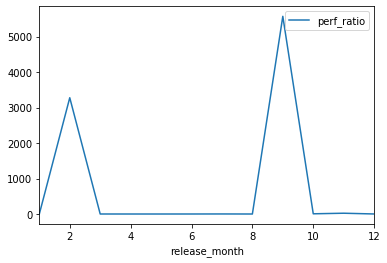

In [188]:
m_df2.groupby('release_month').agg({'perf_ratio': 'mean'}).plot()

In [182]:
m_df2['perf_ratio'].describe()

count    7.224000e+03
mean     8.050025e+02
std      5.066805e+04
min      1.500000e-05
25%      4.072207e-01
50%      1.435941e+00
75%      3.346930e+00
max      3.857119e+06
Name: perf_ratio, dtype: float64

In [187]:
m_df2[['title','release_date','budget','ww_gross','perf_ratio']].sort_values(by = 'perf_ratio', ascending = False).head()

,title,release_date,budget,ww_gross,perf_ratio
524,Poltergeist,1982-09-24,20,77142388,3.857119e+06
6582,Fetih 1453,2012-02-16,18,34484837,1.915824e+06
5711,Paranormal Activity,2009-11-25,15000,193355800,1.289039e+04
2978,The Blair Witch Project,1999-10-22,60000,248639099,4.143985e+03
6992,The Gallows,2015-07-17,100000,42964410,4.296441e+02


SyntaxError: invalid syntax (<ipython-input-189-7396a023aab8>, line 1)